In [1]:
# Imports
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from timeit import default_timer as timer

In [2]:
# Parameters 
# DATASET_FILE_PATH: "BigData.xlsx",
# DATASET_SHEET_TITLE: "data_test",
# GRANULARITY: 10, # Take first item, skip next x, take next, skip x, take next, ...
# STEP_SIZE_SLIDING_WINDOW: 5,
# PAST_HISTORY: 20,
# FUTURE_TARGET: 1, 
# Looks at observations that are PASTHISTORY timesteps prior (reading only every STEP_SIZE_SLIDING_WINDOW entry),
# then predicts the result at FUTURETARGET timesteps in the future
# VAL_PERCENT: 0.1,
# TEST_PERCENT: 0.1,
# EPOCHS: 5,
# BATCH_SIZE: 10 # Splits the dataset into batches of this size: we perform gradiant descent once per batch
# SMOOTHING: 0

# runAll(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
#        FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS_TRAIN, BATCH_SPLITS_VAL, SMOOTHING)

In [3]:
def run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS, SMOOTHING, ATTEMPT_NAME, 
            SHUFFLE_BUFFER_SIZE, MEAN): 
    batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SPLITS, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)
    model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, 
                                                      val_slices, BATCH_SPLITS, EPOCHS, FUTURE_TARGET) 
    evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [26]:
# Load algorithm
%run ./data_management_component.ipynb

In [27]:
%run ./lstm_baseline.ipynb

In [10]:
%run ./evaluation_component.ipynb

In [11]:
ATTEMPT_NAME="LSTM_BASELINE"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
TEST_PERCENT=0.1
EPOCHS=5
BATCH_SPLITS=10
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=100
MEAN=False

# Running the algorithm all at once
#BASELINE = run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, 
#                   PAST_HISTORY, FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS, 
#                   SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

0
Working on dataset: Datasets\uniformdata.xlsx data_uniforma TRAIN SET number 0


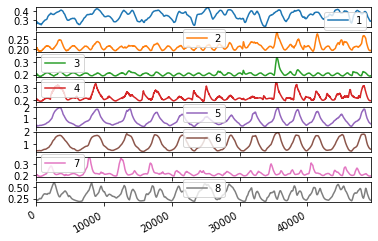

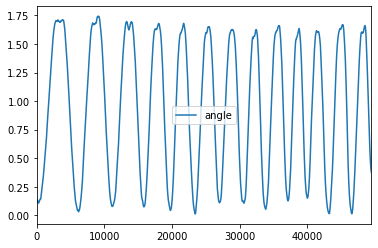

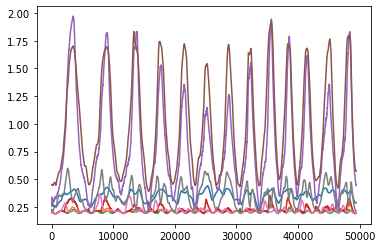

4430
Working on dataset: Datasets\uniformdata.xlsx data_uniformb TRAIN SET number 1


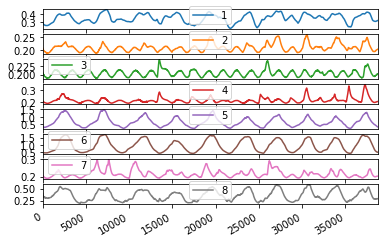

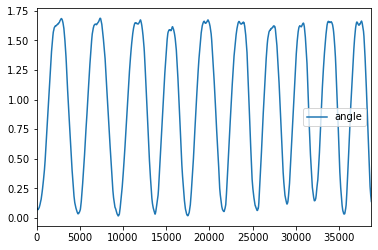

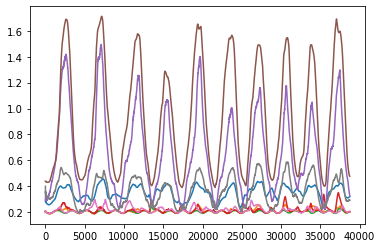

7897
Working on dataset: Datasets\uniformdata.xlsx data_uniformc TRAIN SET number 2


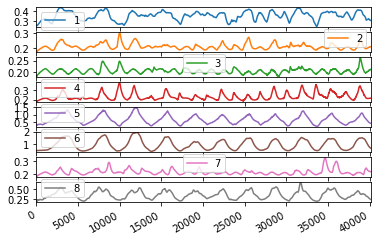

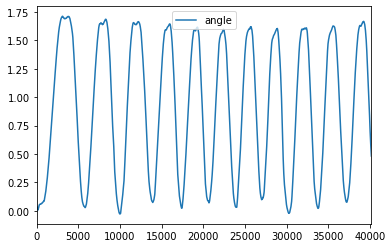

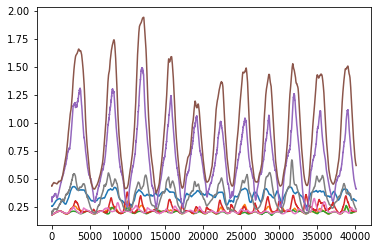

11493
Working on dataset: Datasets\uniformdata.xlsx data_uniformd TRAIN SET number 3


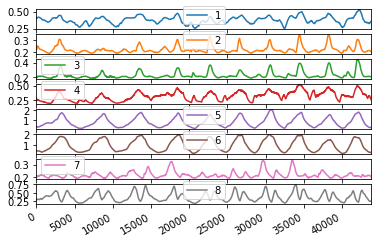

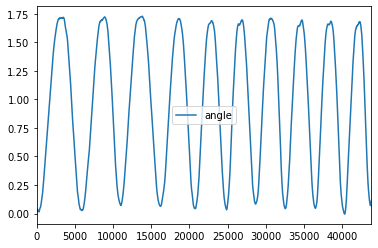

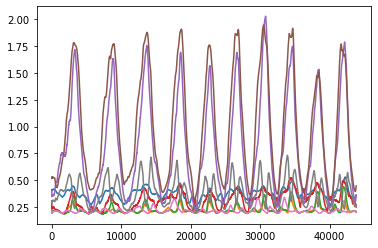

15418
Working on dataset: Datasets\uniformdata.xlsx data_uniforme TEST SET


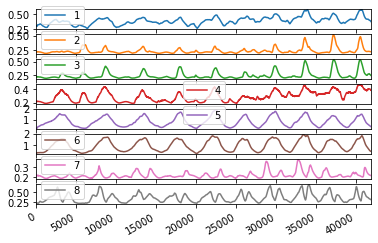

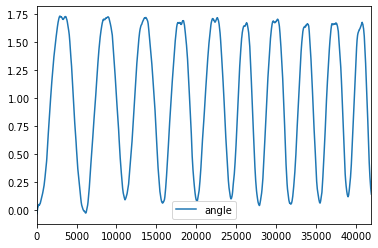

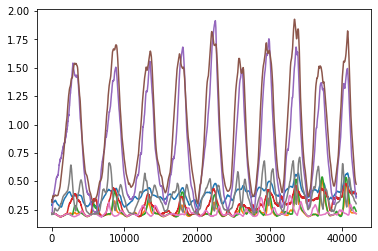

ValueError: Must pass 2-d input

In [28]:
print(x_train.shape)
print(x_train.shape[-2])

batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SPLITS, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)

### TODO: FIX X_TRAIN_ALL.SHAPE[-2] 
# How does it usually look? How should it look now? Maybe just make my own ?? (Pasthistor)

In [ ]:
model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, 
                                                  val_slices, BATCH_SPLITS, EPOCHS, FUTURE_TARGET) 

In [93]:
evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)